In [ ]:
# BASIC LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# TEXT PREPROCESSING
from sklearn.feature_extraction.text import TfidfVectorizer

# MODELING
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# EVALUATION
from sklearn.metrics import accuracy_score


In [ ]:
# LOAD TRAINING DATA
train_val_df = pd.read_excel('/content/INFO 617 Group Project Train Val.xlsx')  # path inside Colab
print(train_val_df.head())

# Check column names
print(train_val_df.columns)


                                            Sentence      Label
0                                             Hello,      GREET
1   the rubella virus IgM was detected at around ...     REPEAT
2  which has a 50% chance of causing intrauterine...  DIAGNOISE
3  Intrauterine infection can lead to risks such ...    EXPLAIN
4  Please note that these risks may or may not oc...    EXPLAIN
Index(['Sentence', 'Label'], dtype='object')


In [ ]:
# Assuming your columns are named 'Sentence' and 'Label'
texts = train_val_df['Sentence'].astype(str).tolist() # Changed 'Text' to 'Sentence'
labels = train_val_df['Label'].tolist()



Checking missing values...
Missing texts: 0
Missing labels: 0

Label distribution:
TREAT                  1188
EXPLAIN                1061
DIAGNOISE               381
QUES                    267
REFERRAL                222
THANK                   145
WAIT                    139
GREET                   120
RECEIVE                 110
REPEAT                   86
CONSOLE                  78
REMIND                   78
WISH                     64
REQUEST_INFORMATION      55
FUTURE_SUPPORT           36
Name: count, dtype: int64


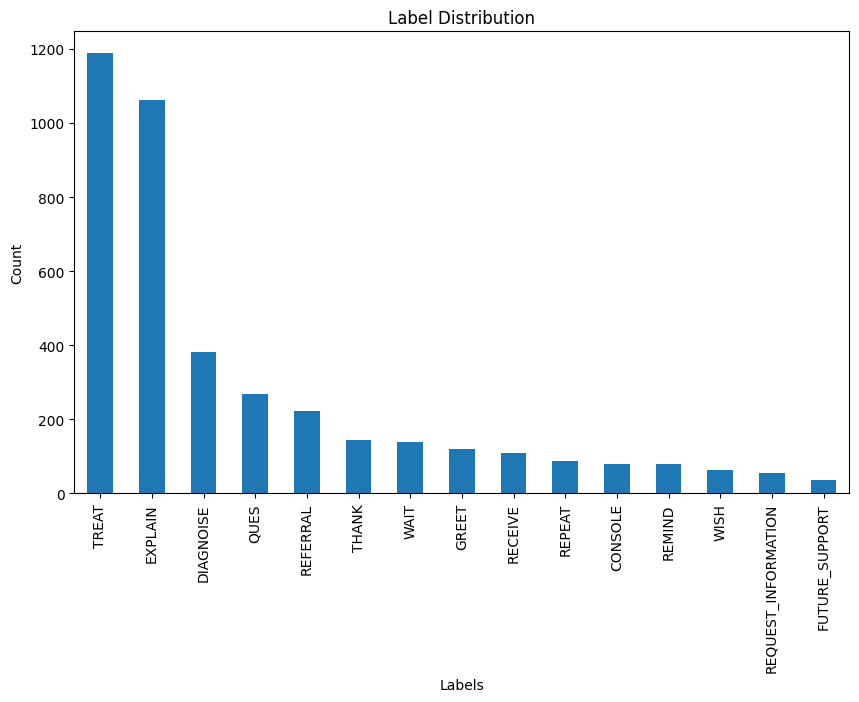


Average text length (words): 15.06
Min text length: 1
Max text length: 109


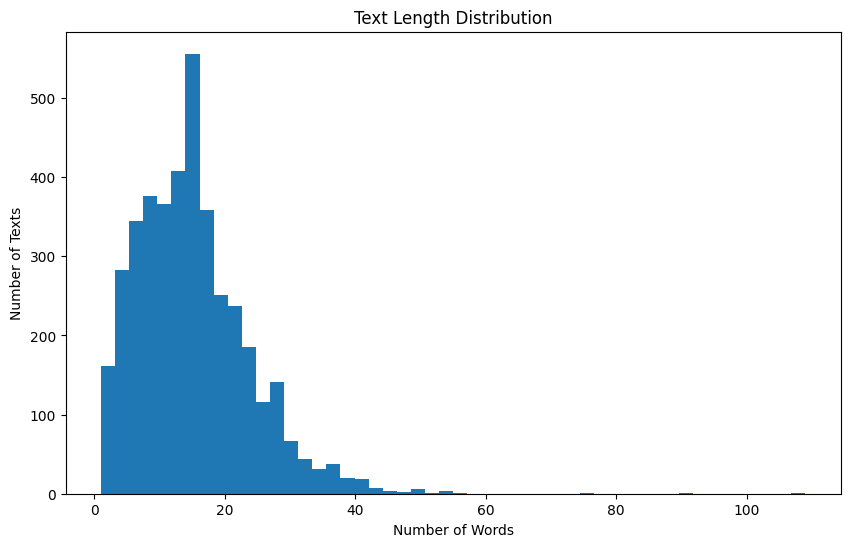

In [ ]:
# ======================================
# EDA
# ======================================

print("Checking missing values...")
print(f"Missing texts: {np.sum(pd.Series(texts).isnull())}")
print(f"Missing labels: {np.sum(pd.Series(labels).isnull())}")

print("\nLabel distribution:")
label_counts = pd.Series(labels).value_counts()
print(label_counts)

plt.figure(figsize=(10,6))
label_counts.plot(kind='bar')
plt.title("Label Distribution")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.show()

# Text lengths
text_lengths = [len(text.split()) for text in texts]
print(f"\nAverage text length (words): {np.mean(text_lengths):.2f}")
print(f"Min text length: {np.min(text_lengths)}")
print(f"Max text length: {np.max(text_lengths)}")

plt.figure(figsize=(10,6))
plt.hist(text_lengths, bins=50)
plt.title("Text Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Number of Texts")
plt.show()

# Lowercase and strip spaces
texts = [text.lower().strip() for text in texts]


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    texts, labels, test_size=0.1, random_state=42, stratify=labels  # stratify to balance classes
)


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)


In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)

y_pred_logreg = log_reg.predict(X_val_tfidf)
logreg_acc = accuracy_score(y_val, y_pred_logreg)

print(f"Logistic Regression Validation Accuracy: {logreg_acc*100:.2f}%")


Logistic Regression Validation Accuracy: 69.48%


In [ ]:
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_tfidf, y_train)

y_pred_svm = svm_model.predict(X_val_tfidf)
svm_acc = accuracy_score(y_val, y_pred_svm)

print(f"SVM Validation Accuracy: {svm_acc*100:.2f}%")


SVM Validation Accuracy: 72.95%


In [ ]:
# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)

# Predict on Train and Validation
y_pred_train_logreg = log_reg.predict(X_train_tfidf)
y_pred_val_logreg = log_reg.predict(X_val_tfidf)

# Accuracy
logreg_train_acc = accuracy_score(y_train, y_pred_train_logreg)
logreg_val_acc = accuracy_score(y_val, y_pred_val_logreg)

print(f"Logistic Regression Training Accuracy: {logreg_train_acc*100:.2f}%")
print(f"Logistic Regression Validation Accuracy: {logreg_val_acc*100:.2f}%")


Logistic Regression Training Accuracy: 82.41%
Logistic Regression Validation Accuracy: 69.48%


In [ ]:
# LOAD TEST DATA
test_df = pd.read_excel('/content/INFO 617_Group Project Test Set.xlsx')  # path inside Colab

# Check column names
print(test_df.columns)

# Assuming test_df also has 'Sentence' and 'Label' columns, changed 'Text' to 'Sentence'
test_texts = test_df['Sentence'].astype(str).tolist() # Changed 'Text' to 'Sentence' to match the DataFrame column name
test_labels = test_df['Label'].tolist()


Index(['Sentence', 'Label'], dtype='object')


In [ ]:
# Lowercase and strip test texts
test_texts = [text.lower().strip() for text in test_texts]

# Transform using same TF-IDF Vectorizer
X_test_tfidf = tfidf_vectorizer.transform(test_texts)


In [ ]:
# Predict on Test Set (Logistic Regression)
y_pred_test_logreg = log_reg.predict(X_test_tfidf)
logreg_test_acc = accuracy_score(test_labels, y_pred_test_logreg)

print(f"Logistic Regression Test Accuracy: {logreg_test_acc*100:.2f}%")


Logistic Regression Test Accuracy: 67.65%


In [ ]:
# Predict on Test Set (SVM)
y_pred_test_svm = svm_model.predict(X_test_tfidf)
svm_test_acc = accuracy_score(test_labels, y_pred_test_svm)

print(f"SVM Test Accuracy: {svm_test_acc*100:.2f}%")


SVM Test Accuracy: 72.37%
